# Graph - Traversal

---

In [1]:
from collections import deque
from typing import List

from importnb import Notebook

from theoria.validor import TestCase, Validor

with Notebook():
    from notebooks.computer_science.algorithms.graphs.__basic__representation import (
        AdjacencyListDirectedGraph,
        GraphNode,
    )

## Depth First Search (DFS)

In [2]:
class DirectedGraphDFS:
    def __call__(
        self,
        graph: AdjacencyListDirectedGraph,
        root: GraphNode,
    ) -> List[GraphNode]:
        visited = set()
        result = []

        def dfs(node: GraphNode) -> None:
            if node in visited:
                return

            visited.add(node)
            result.append(node)

            for neighbor in graph.adjacency_list[node]:
                dfs(neighbor)

        dfs(root)
        return result

## Breadth First Search (BFS)

In [3]:
class DirectedGraphBFS:
    def __call__(
        self,
        graph: AdjacencyListDirectedGraph,
        root: GraphNode,
    ) -> List[GraphNode]:
        result = []

        queue = deque([root])
        visited = {root}

        while queue:
            node = queue.popleft()
            result.append(node)

            for neighbor in graph.adjacency_list[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return result

## Tests

In [4]:
def build_test_adj_graph(
    graph: AdjacencyListDirectedGraph,
    root: GraphNode,
    expected_output: List[GraphNode],
    description: str,
) -> TestCase:
    tc = TestCase(
        input_data={"graph": graph, "root": root},
        expected_output=expected_output,
        description=description,
    )
    return tc

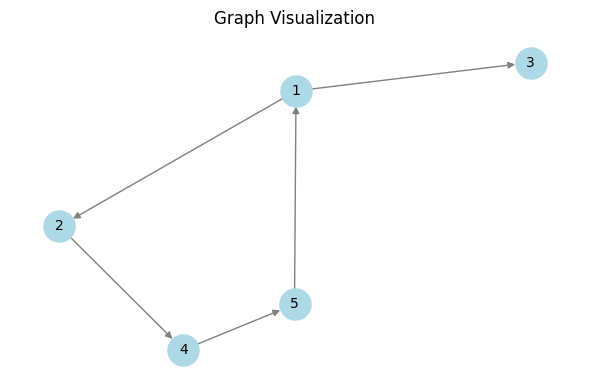

[2025-12-02 20:37:21,922] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x79c29f9d7bf0>.
[2025-12-02 20:37:21,923] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x79c29f6f7f20>.


In [5]:
adj_graph_1 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(2), GraphNode(3)],
        GraphNode(2): [GraphNode(4)],
        GraphNode(3): [],
        GraphNode(4): [GraphNode(5)],
        GraphNode(5): [GraphNode(1)],
    }
)


if __name__ == "__main__":
    adj_graph_1.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_1,
            root=GraphNode(1),
            expected_output=[
                GraphNode(1),
                GraphNode(2),
                GraphNode(4),
                GraphNode(5),
                GraphNode(3),
            ],
            description="Fully connected directed graph DFS traversal",
        )
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_1,
            root=GraphNode(1),
            expected_output=[
                GraphNode(1),
                GraphNode(2),
                GraphNode(3),
                GraphNode(4),
                GraphNode(5),
            ],
            description="Fully connected directed graph BFS traversal",
        )
    ).run()

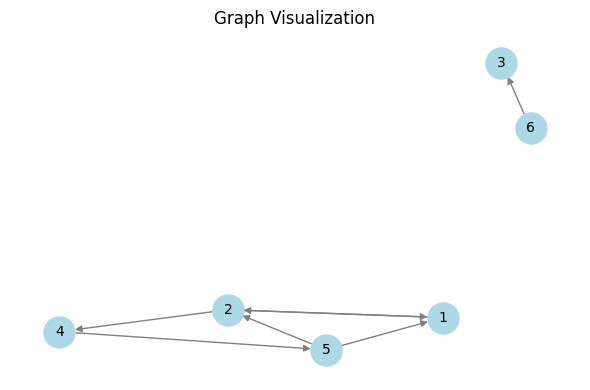

[2025-12-02 20:37:22,102] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x79c29f64fb30>.
[2025-12-02 20:37:22,103] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x79c29f204050>.


In [6]:
adj_graph_2 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(2)],
        GraphNode(2): [GraphNode(4), GraphNode(1)],
        GraphNode(3): [],
        GraphNode(4): [GraphNode(5)],
        GraphNode(5): [GraphNode(1), GraphNode(2)],
        GraphNode(6): [GraphNode(3)],
    }
)


if __name__ == "__main__":
    adj_graph_2.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_2,
            root=GraphNode(2),
            expected_output=[
                GraphNode(2),
                GraphNode(4),
                GraphNode(5),
                GraphNode(1),
            ],
            description="Disconnected directed graph DFS traversal",
        )
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_2,
            root=GraphNode(2),
            expected_output=[
                GraphNode(2),
                GraphNode(4),
                GraphNode(1),
                GraphNode(5),
            ],
            description="Disconnected directed graph BFS traversal",
        )
    ).run()

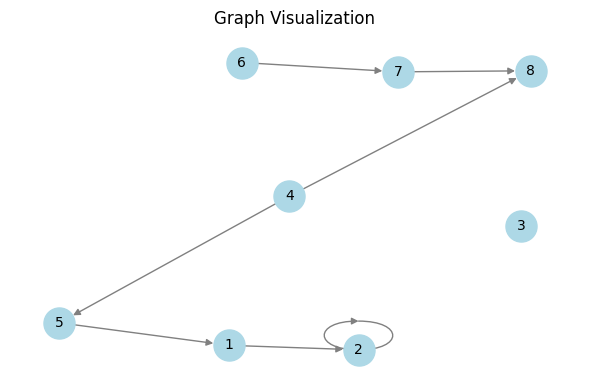

[2025-12-02 20:37:22,249] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x79c29f5fbef0>.
[2025-12-02 20:37:22,250] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x79c29f105df0>.


In [7]:
adj_graph_3 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(2)],
        GraphNode(2): [GraphNode(2)],
        GraphNode(3): [],
        GraphNode(4): [GraphNode(5), GraphNode(8)],
        GraphNode(5): [GraphNode(1)],
        GraphNode(6): [GraphNode(7)],
        GraphNode(7): [GraphNode(8)],
    }
)


if __name__ == "__main__":
    adj_graph_3.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_3,
            root=GraphNode(1),
            expected_output=[
                GraphNode(1),
                GraphNode(2),
            ],
            description="Directional DFS",
        )
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_3,
            root=GraphNode(1),
            expected_output=[
                GraphNode(1),
                GraphNode(2),
            ],
            description="Directional BFS",
        )
    ).run()

## Complexity

| Graph Representation          | Traversal Method | Time Complexity | Space Complexity          |
|-------------------------------|------------------|-----------------|--------------------------|
| Adjacency List                 | DFS              | $O(V + E)$        | $O(V)$ (visited + recursion stack) |
| Adjacency List                 | BFS              | $O(V + E)$        | $O(V$) (visited + queue)   |
| Adjacency Matrix              | DFS              | $O(V^2)$          | $O(V)$                     |
| Adjacency Matrix              | BFS              | $O(V^2)$          | $O(V)$                     |

- $V$: Number of vertices (nodes)
- $E$: Number of edges

**Notes:**
- For adjacency list, both DFS and BFS have linear complexity relative to nodes and edges.
- For adjacency matrix, time complexity is quadratic due to scanning all matrix entries.
